# Multiple Qubits & Entangled States

Today,we will see how we can represent the state of multiple qubits.




## 1. Representing Multi-Qubit States <a id="represent"></a>

* We saw that a single bit has two possible states, and a qubit state has two complex amplitudes. 
* Similarly, two bits have four possible states:

`00` `01` `10` `11`

And to describe the state of two qubits requires four complex amplitudes. We store these amplitudes in a 4D-vector like so:

$$ |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

The rules of measurement still work in the same way:

$$ p(|00\rangle) = |\langle 00 | a \rangle |^2 = |a_{00}|^2$$

And the same implications hold, such as the normalisation condition:

$$ |a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1$$

If we have two separated qubits, we can describe their collective state using the tensor product:

$$ |a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$

$$ 
|ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\ b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix}
$$

And following the same rules, we can use the tensor product to describe the collective state of any number of qubits. Here is an example with three qubits:



In [1]:
from qiskit import QuantumCircuit, execute,QuantumCircuit, ClassicalRegister, QuantumRegister, Aer
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
%matplotlib inline

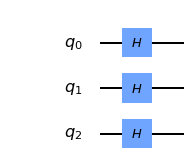

In [2]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw('mpl')

Each qubit is in the state $|+\rangle$, so we should see the vector:

$$ 
|{+++}\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix}
$$
![HHH](figures/HHH.jpg)

In [3]:
# Let's see the result
def final_state(circuit):
    backend = Aer.get_backend('statevector_simulator')
    final_state = execute(circuit,backend).result().get_statevector()
    return final_state
fs=final_state(qc)
fs

array([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
       0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j])

In [4]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(fs, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>



### 1.1 Quick Exercises: <a id="ex1"></a>

1.	Write down the tensor product of the qubits:    
    a)	$|0\rangle|1\rangle$    = $|01 \rangle$  
    b)	$|0\rangle|+\rangle$    
    c)	$|+\rangle|1\rangle$    
    d)	$|-\rangle|+\rangle$    
2.	Write the state:
    $|\psi\rangle = \tfrac{1}{\sqrt{2}}|00\rangle + \tfrac{i}{\sqrt{2}}|01\rangle $
    as two separate qubits.
    
![1ac](figures/1ac.jpg)

## 2. Single Qubit Gates on Multi-Qubit Statevectors <a id="single-qubit-gates"></a>

We have seen that an X-gate is represented by the matrix:

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

And that it acts on the state $|0\rangle$ as so:

$$
X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1\end{bmatrix}
$$

but it may not be clear how an X-gate would act on a qubit in a multi-qubit vector. Fortunately, the rule is quite simple; just as we used the tensor product to calculate multi-qubit statevectors, we use the tensor product to calculate matrices that act on these statevectors. For example, in the circuit below:

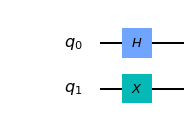

In [5]:
qchx = QuantumCircuit(2)
qchx.h(0)
qchx.x(1)
qchx.draw('mpl')

we can represent the simultaneous operations (H & X) using their tensor product:

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

The operation looks like this:

$$
X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\ 
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
$$

Which we can then apply to our 4D statevector $|q_1 q_0\rangle$. This can become quite messy, you will often see the clearer notation:

$$
X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$

Instead of calculating this by hand, we can use Qiskit’s `unitary_simulator` to calculate this for us. The unitary simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:

In [6]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qchx,backend).result().get_unitary()

and view the results:

In [7]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

If we want to apply a gate to only one qubit at a time (such as in the circuit below), we do the tensor product with the identity matrix, e.g.:

$$ X \otimes I $$

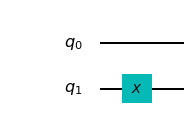

In [8]:
qci = QuantumCircuit(2)
qci.x(1)
qci.draw('mpl')

In [9]:
# Simulate the unitary
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qci,backend).result().get_unitary()
# Display the results:
array_to_latex(unitary, pretext="\\text{Circuit = } ")

<IPython.core.display.Math object>

We can see Qiskit has performed the tensor product:
$$
X \otimes I =
\begin{bmatrix} 0 & I \\
               I & 0\\
\end{bmatrix} = 
\begin{bmatrix} 0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                1 & 0 & 0 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix}
$$

### 2.1 Quick Exercises: <a id="ex2"></a>

1. Calculate the single qubit unitary ($U$) created by the sequence of gates: $U = XZH$. Use Qiskit's unitary simulator to check your results.
2. Try changing the gates in the circuit above. Calculate their tensor product, and then check your answer using the unitary simulator.

**Note:** Different books, softwares and websites order their qubits differently. This means the tensor product of the same circuit can look very different. Try to bear this in mind when consulting other sources. 


## 3. Multi-Qubit Gates <a id="multi-qubit-gates"></a>

Now we know how to represent the state of multiple qubits, we are now ready to learn how qubits interact with each other. An important two-qubit gate is the CNOT-gate.

### 3.1 The CNOT-Gate <a id="cnot"></a>

You have come across this gate before in _[The Atoms of Computation](../ch-states/atoms-computation.ipynb)._ This gate is a conditional gate that performs an X-gate on the second qubit (target), if the state of the first qubit (control) is $|1\rangle$. The gate is drawn on a circuit like this, with `q0` as the control and `q1` as the target:

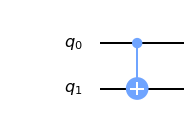

In [10]:
qcn = QuantumCircuit(2)
# Apply CNOT
qcn.cx(0,1)
# See the circuit:
qcn.draw('mpl')

When our qubits are not in superposition of $|0\rangle$ or $|1\rangle$ (behaving as classical bits), this gate is very simple and intuitive to understand. We can use the classical truth table:

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |

And acting on our 4D-statevector, it has one of the two matrices:

$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}, \quad
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}
$$

depending on which qubit is the control and which is the target. Different books, simulators and papers order their qubits differently. In our case, the left matrix corresponds to the CNOT in the circuit above. This matrix swaps the amplitudes of $|01\rangle$ and $|11\rangle$ in our statevector:

$$ 
|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

We have seen how this acts on classical states, but let’s now see how it acts on a qubit in superposition. We will put one qubit in the state $|+\rangle$:

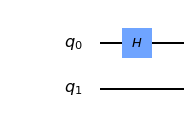

In [11]:
qch = QuantumCircuit(2)
# Apply H-gate to the first:
qch.h(0)
qch.draw('mpl')

![ZeroH](figures/ZeroH.jpg)

In [12]:
# # Let's see the result:
# backend = Aer.get_backend('statevector_simulator')
# final_state = execute(qch,backend).result().get_statevector()


fs1 = final_state(qch)
fs1

array([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j])

In [13]:
# # Print the statevector neatly:
array_to_latex(fs1, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

As expected, this produces the state $|0\rangle \otimes |{+}\rangle = |0{+}\rangle$:

$$
|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$

![0+](figures/ZeroPlusState.jpg)
And let’s see what happens when we apply the CNOT gate:

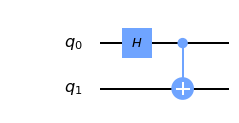

In [14]:
qchn = QuantumCircuit(2)
# Apply H-gate to the first:
qchn.h(0)
# Apply a CNOT:
qchn.cx(0,1)
qchn.draw('mpl')

In [15]:
# Let's see the result:
fs2 = final_state(qchn)
# Print the statevector neatly:
array_to_latex(fs2, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

We see we have the state:

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

This state is very interesting to us, because it is _entangled._ This leads us neatly on to the next section.

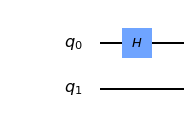

In [22]:
qcu = QuantumCircuit(2)
# Apply H-gate to the first:
qcu.h(0)
qcu.draw('mpl')

In [23]:
# Let's see the result:
backend = Aer.get_backend('unitary_simulator')
final_state = execute(qcu,backend).result().get_unitary()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Circuit = }")

<IPython.core.display.Math object>

![IH](figures/IH.jpg)

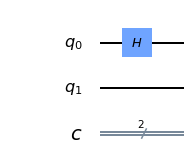

In [25]:
qcm = QuantumCircuit(2,2)
# Apply H-gate to the first:
qcm.h(0)
qcm.draw('mpl')

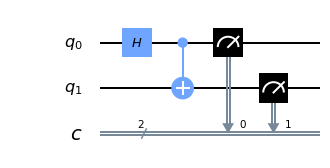

In [27]:
qcm.cx(0,1)
qcm.measure([0,1],[0,1])
qcm.draw('mpl')

In [32]:
# Let's see the result:
backend = Aer.get_backend('qasm_simulator')
results = execute(qcm,backend, shots=1000).result()
counts  = results.get_counts(qcm)
print(counts)

{'11': 522, '00': 478}


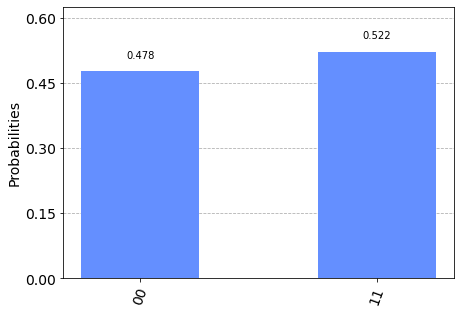

In [34]:
plot_histogram(counts)

### 3.2 Entangled States <a id="entangled"></a>

We saw in the previous section we could create the state:

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

This is known as a _Bell_ state. We can see that this state has 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. Most interestingly, it has a **0%** chance of being measured in the states $|01\rangle$ or $|10\rangle$. We can see this in Qiskit:

This combined state cannot be written as two separate qubit states, which has interesting implications. Although our qubits are in superposition, measuring one will tell us the state of the other and collapse its superposition. For example, if we measured the top qubit and got the state $|1\rangle$, the collective state of our qubits changes like so:

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \xrightarrow[]{\text{measure}} \quad |11\rangle
$$

Even if we separated these qubits light-years away, measuring one qubit collapses the superposition and appears to have an immediate effect on the other. This is the [‘spooky action at a distance’](https://en.wikipedia.org/wiki/Quantum_nonlocality) that upset so many physicists in the early 20th century.

It’s important to note that the measurement result is random, and the measurement statistics of one qubit are **not** affected by any operation on the other qubit. Because of this, there is **no way** to use shared quantum states to communicate. This is known as the no-communication theorem.[1]

### 3.3 Exercise: <a id="ex3"></a>
1. Create a quantum circuit that produces the Bell state: $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$.
   Use the statevector simulator to verify your result.
   
   
2. The circuit you created in question 1 transforms the state $|00\rangle$ to $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$, calculate the unitary of this circuit using Qiskit's simulator. Verify this unitary does in fact perform the correct transformation.

## 4. References

[1] Asher Peres, Daniel R. Terno, _Quantum Information and Relativity Theory,_ 2004, https://arxiv.org/abs/quant-ph/0212023

In [21]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.0',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.0',
 'qiskit-aqua': '0.7.0',
 'qiskit': '0.19.0'}